Exercise 1.1 If you have Jupyter, load chap01.ipynb, read through it, and
run the examples. You can also view this notebook at http://tinyurl.com/
thinkdsp01.

Exercise 1.2 Go to http://freesound.org and download a sound sample
that includes music, speech, or other sounds that have a well-defined pitch.
Select a roughly half-second segment where the pitch is constant. Compute
and plot the spectrum of the segment you selected. What connection can you
make between the timbre of the sound and the harmonic structure you see in
the spectrum?
Use high_pass, low_pass, and band_stop to filter out some of the harmonics.
Then convert the spectrum back to a wave and listen to it. How does the sound
relate to the changes you made in the spectrum?

Exercise 1.3 Synthesize a compound signal by creating SinSignal and CosSignal objects and adding them up. Evaluate the signal to get a Wave, and listen
to it. Compute its Spectrum and plot it. What happens if you add frequency
components that are not multiples of the fundamental?

Exercise 1.4 Write a function called stretch that takes a Wave and a stretch
factor and speeds up or slows down the wave by modifying ts and framerate.
Hint: it should only take two lines of code.

In [5]:
from thinkdsp import read_wave

wave = read_wave('sing.wav')
segment = wave.segment(start=2, duration=0.5)
segment.make_audio()

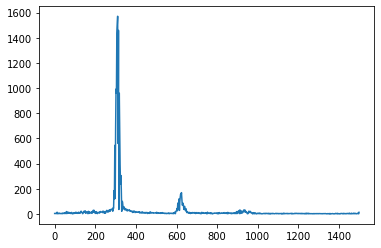

In [11]:
spectrum = segment.make_spectrum()
spectrum.plot(high=1500)

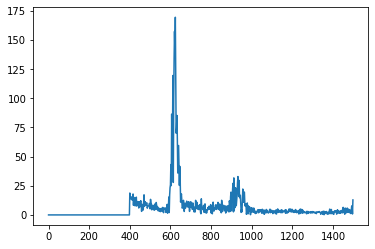

In [25]:
filtered = segment.make_spectrum()
filtered.high_pass(cutoff=400)
filtered.plot(high=1500)
filtered.make_wave().make_audio()

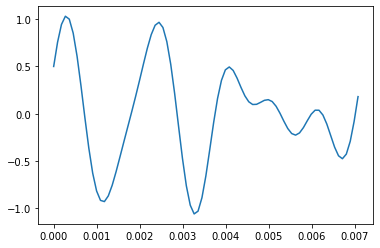

In [37]:
from thinkdsp import CosSignal, SinSignal

cos_signal = CosSignal(freq=420, amp=0.5)
sin_signal = SinSignal(freq=840, amp=0.25)
oof_signal = SinSignal(freq=555, amp=0.5)

mix_signal = cos_signal + sin_signal + oof_signal
wave = mix_signal.make_wave(duration=1)
mix_signal.plot()
wave.make_audio()

In [70]:
from thinkdsp import Wave
def stretch(wave: Wave, factor: float) -> Wave:
    swave = wave.copy()
    swave.ts = wave.ts / factor
    swave.framerate = wave.framerate * factor
    return swave

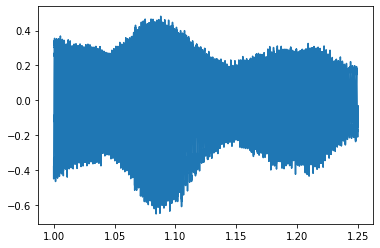

In [75]:
swave = stretch(segment, 2)
swave.make_audio()
swave.plot()

In [63]:
wave.make_audio()